In [7]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from src.preprocessors.dasps import DaspsPreprocessor

trials = DaspsPreprocessor.get_trials(duration=15, autoreject=False)

In [ ]:
for trial in tqdm(trials):
    trial.compute_powers(False)

In [ ]:
from src.utils import oversample

oversampled_trials = oversample(trials)
oversampled_trials.shape

Train samples:  374
Test samples:  94


  0%|          | 0/200 [00:00<?, ?it/s]

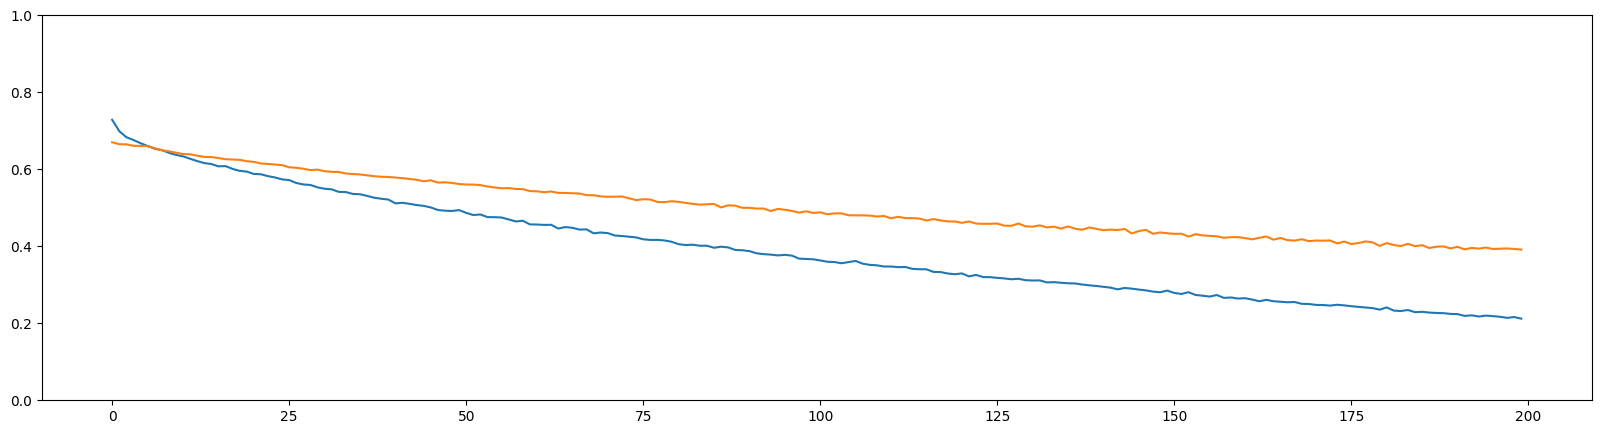

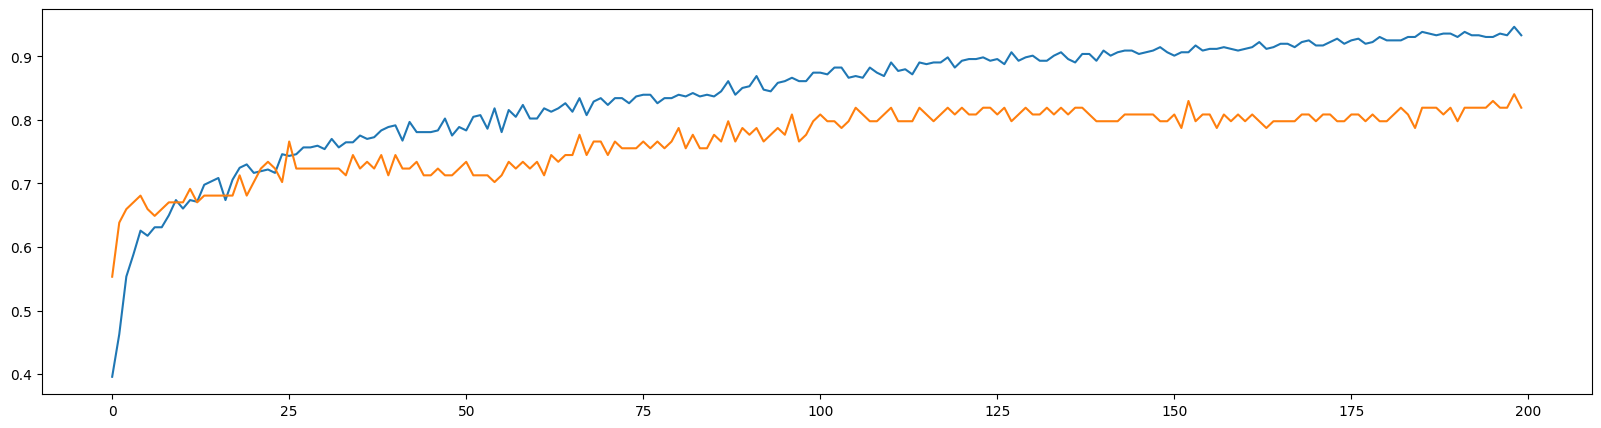

Avg test acc last 10 epochs:  0.8202127


In [49]:
from src.utils import train_eval_pytorch_model
from sklearn.model_selection import train_test_split
from src.models.cnn import RatiosCnnDataset, RatiosCNN

trials_train, trials_test = train_test_split(oversampled_trials, train_size=0.8)

train_dataset = RatiosCnnDataset(trials_train)
test_dataset = RatiosCnnDataset(trials_test)

model = RatiosCNN(2)
train_eval_pytorch_model(model, train_dataset, test_dataset, num_epochs=200, learning_rate=0.00015)